# This is part 1 of this project...

In this part, we will extract the dataset, import the required libraries, and load the data for a first look.

Extract the dataset.

In [18]:
import zipfile

with zipfile.ZipFile("dataset.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")
print("Unzipped dataset.zip to the 'dataset' folder.")

Unzipped dataset.zip to the 'dataset' folder.


Import the libraries we'll use for data handling.

In [19]:
import numpy as np
import pandas as pd

Load the CSV file and display the first 10 rows to verify successful import.

In [20]:
df = pd.read_csv("dataset/Real_Estate_Sales_2001-2022_GL.csv", low_memory=False)
df.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.460600,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.629100,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.496500,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)
5,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family,NaN,NaN,NaN,NaN
6,200121,2020,12/15/2020,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family,NaN,NaN,NaN,POINT (-72.89675 41.79445)
7,20058,2020,06/01/2021,Barkhamsted,46 RATLUM MTN RD,203530.0,415000.0,0.490434,Residential,Single Family,NaN,"2003 COLONIAL, 2140 SFLA, 2.99 AC",NaN,NaN
8,200046,2020,01/25/2021,Beacon Falls,34 LASKY ROAD,158030.0,243000.0,0.650300,Residential,Single Family,NaN,NaN,NaN,NaN
9,200016,2020,11/13/2020,Beacon Falls,9 AVON COURT,65590.0,100000.0,0.655900,Residential,Condo,NaN,NaN,NaN,NaN


# Part 1 – Building and Exploring a Tabular Dataset

In this part, we will build and prepare a tabular dataset for a regression problem using a real estate sales dataset. We will document the source, select relevant columns, split the data into training and test subsets, and save these subsets for later use.

## Problem Type

The problem addressed is a **regression** task: we aim to predict the sale price of a property based on its features.

## Data Source and Description

The data comes from a CSV file containing real estate sales (`Real_Estate_Sales_2001-2022_GL.csv`). Each row represents a transaction, and the columns include information about listing year, property type, residential type, etc. We will select 8 relevant columns, with at least 3 different data types (numeric, real, categorical).

## Loading and Previewing data set.

We will load the data set and preview it.

In [21]:
# Încărcare date
df = pd.read_csv("dataset/Real_Estate_Sales_2001-2022_GL.csv", low_memory=False)

df = df.dropna(subset=["Sale Amount"])  # eliminate rows with NaN in 'Sale Amount'
df.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.460600,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.629100,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.496500,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)
5,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family,NaN,NaN,NaN,NaN
6,200121,2020,12/15/2020,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family,NaN,NaN,NaN,POINT (-72.89675 41.79445)
7,20058,2020,06/01/2021,Barkhamsted,46 RATLUM MTN RD,203530.0,415000.0,0.490434,Residential,Single Family,NaN,"2003 COLONIAL, 2140 SFLA, 2.99 AC",NaN,NaN
8,200046,2020,01/25/2021,Beacon Falls,34 LASKY ROAD,158030.0,243000.0,0.650300,Residential,Single Family,NaN,NaN,NaN,NaN
9,200016,2020,11/13/2020,Beacon Falls,9 AVON COURT,65590.0,100000.0,0.655900,Residential,Condo,NaN,NaN,NaN,NaN


## Splitting into Training and Test Subsets

We will randomly split the data: 25% for testing, 75% for training.

In [22]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)
print(f"Train set: {len(train_df)} rows")
print(f"Test set: {len(test_df)} rows")

Train set: 823221 rows
Test set: 274408 rows


## Saving the Subsets

We export the subsets to separate CSV files.

In [23]:
train_df.to_csv("dataset/train.csv", index=False)
test_df.to_csv("dataset/test.csv", index=False)
print("Saved train.csv and test.csv in the dataset folder.")

Saved train.csv and test.csv in the dataset folder.


# Exploratory Data Analysis

## Missing values analysis
We observe which columns have missing values and their proportion.

If the percentage is low, we can drop those rows. If high, we may consider imputation (mean for numeric, mode for categorical).

In [24]:
# Train set - missing values (count and percent)
print("Train set - missing values (count and percent):")
missing_train = train_df.isnull().sum().to_frame('Count').assign(Percent=lambda x: 100 * x['Count'] / len(train_df))
display(missing_train)

# Test set - missing values (count and percent)
print("Test set - missing values (count and percent):")
missing_test = test_df.isnull().sum().to_frame('Count').assign(Percent=lambda x: 100 * x['Count'] / len(test_df))
display(missing_test)

Train set - missing values (count and percent):


,Count,Percent
Serial Number,0,0.000000
List Year,0,0.000000
Date Recorded,1,0.000121
Town,0,0.000000
Address,42,0.005102
Assessed Value,0,0.000000
Sale Amount,0,0.000000
Sales Ratio,0,0.000000
Property Type,286509,34.803412
Residential Type,298441,36.252841


Test set - missing values (count and percent):


,Count,Percent
Serial Number,0,0.000000
List Year,0,0.000000
Date Recorded,1,0.000364
Town,0,0.000000
Address,9,0.003280
Assessed Value,0,0.000000
Sale Amount,0,0.000000
Sales Ratio,0,0.000000
Property Type,95937,34.961444
Residential Type,99948,36.423136


## Selecting columns that matter

In [25]:
selected_columns = [
"List Year",        # numeric (int),
"Date Recorded",    # categoric (str),
"Town",             # categoric (str),
"Address",          # categoric (str),
"Assessed Value",   # numeric (int),
"Sale Amount",      # numeric (int) - target,
"Property Type",    # categoric (str),
"Residential Type"  # categoric (str),
]
train_df = train_df[selected_columns]
test_df = test_df[selected_columns]

## Descriptive statistics
We analyze means, medians, min/max for numeric columns and frequencies for categorical columns. We can spot outliers or class imbalance.

In [26]:
print("For train set:")
display(train_df.describe(include='all'))
print("For test set:")
display(test_df.describe(include='all'))

For train set:


,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Property Type,Residential Type
count,823221.000000,823220,823221,823179,8.232210e+05,8.232210e+05,536712,524780
unique,NaN,6780,169,620818,NaN,NaN,11,5
top,NaN,07/01/2005,Bridgeport,MULTI ADDRESSES,NaN,NaN,Single Family,Single Family
freq,NaN,662,28603,449,NaN,NaN,301257,381328
mean,2011.223481,NaN,NaN,NaN,2.806696e+05,4.076240e+05,NaN,NaN
std,6.774722,NaN,NaN,NaN,1.424924e+06,5.846522e+06,NaN,NaN
min,2001.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN
25%,2005.000000,NaN,NaN,NaN,8.904000e+04,1.450000e+05,NaN,NaN
50%,2011.000000,NaN,NaN,NaN,1.405600e+05,2.330000e+05,NaN,NaN
75%,2018.000000,NaN,NaN,NaN,2.280600e+05,3.750000e+05,NaN,NaN


For test set:


,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Property Type,Residential Type
count,274408.000000,274407,274408,274399,2.744080e+05,2.744080e+05,178471,174460
unique,NaN,6135,170,245120,NaN,NaN,11,5
top,NaN,06/30/2005,Bridgeport,MULTI ADDRESSES,NaN,NaN,Single Family,Single Family
freq,NaN,227,9555,171,NaN,NaN,100355,126716
mean,2011.203139,NaN,NaN,NaN,2.851976e+05,3.983864e+05,NaN,NaN
std,6.769763,NaN,NaN,NaN,2.214309e+06,1.810150e+06,NaN,NaN
min,2001.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN
25%,2005.000000,NaN,NaN,NaN,8.918000e+04,1.450000e+05,NaN,NaN
50%,2011.000000,NaN,NaN,NaN,1.406000e+05,2.330000e+05,NaN,NaN
75%,2018.000000,NaN,NaN,NaN,2.288000e+05,3.750000e+05,NaN,NaN


## Outlier detection
We identify extreme values (outliers) that may affect modeling. We may decide to remove or transform them.

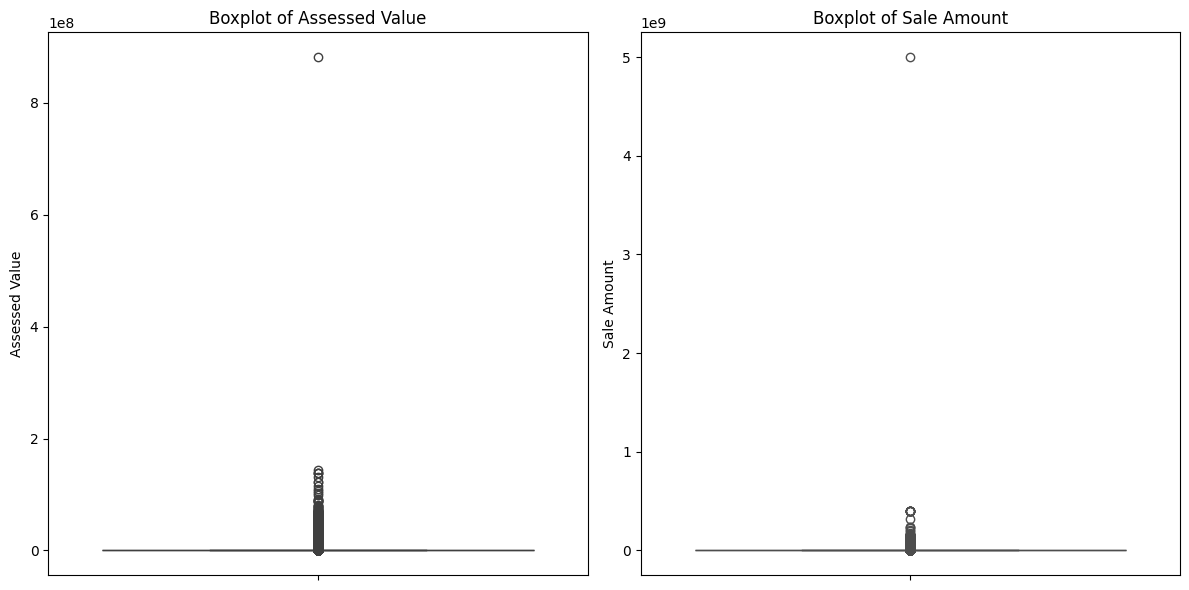

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["Assessed Value", "Sale Amount"]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Assessed Value'])
plt.title('Boxplot of Assessed Value')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Sale Amount'], color='orange')
plt.title('Boxplot of Sale Amount')
plt.tight_layout()
plt.show()

## Correlation analysis


In [ ]:
num_cols = ["List Year", "Assessed Value", "Sale Amount"]

plt.figure(figsize=(6,4))
corr = train_df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation matrix (train)")
plt.show()

SyntaxError: invalid syntax (3397037306.py, line 2)